# Be Filter Thickness Investigation

Luxel has told us acquiring 8 $\mu$m Be may be challenging and that actual thicknesses may be uncertain and could be up to 12.5 $\mu$m.
Question to answer: how much does this impact our throughput in the filtergrams?

In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from mocksipipeline.detector.response import Channel, ThinFilmFilter, get_all_filtergram_channels
from mocksipipeline.physics.dem import compute_temperature_response
from mocksipipeline.physics.spectral import SpectralModel

from astropy.visualization import quantity_support

In [2]:
spectra = SpectralModel().spectral_table

In [4]:
thin_be_original = Channel('filtergram_1')
less_thin_be = Channel('filtergram_1',
                       filters=ThinFilmFilter('Be', thickness=12.5*u.micron, xrt_table=thin_be_original.xrt_table_name))

In [5]:
current_al_poly = Channel('filtergram_4')
modified_al_poly = Channel(
    'filtergram_4',
    filters=[ThinFilmFilter(elements=['C','H','N','O'],
                            quantities=[22,10,2,5],
                            thickness=1.7*u.micron,
                            density=1.43*u.g/u.cm**3,
                            xrt_table=current_al_poly.xrt_table_name),
             ThinFilmFilter('Al', thickness=500*u.nm, xrt_table=current_al_poly.xrt_table_name)])

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:673: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


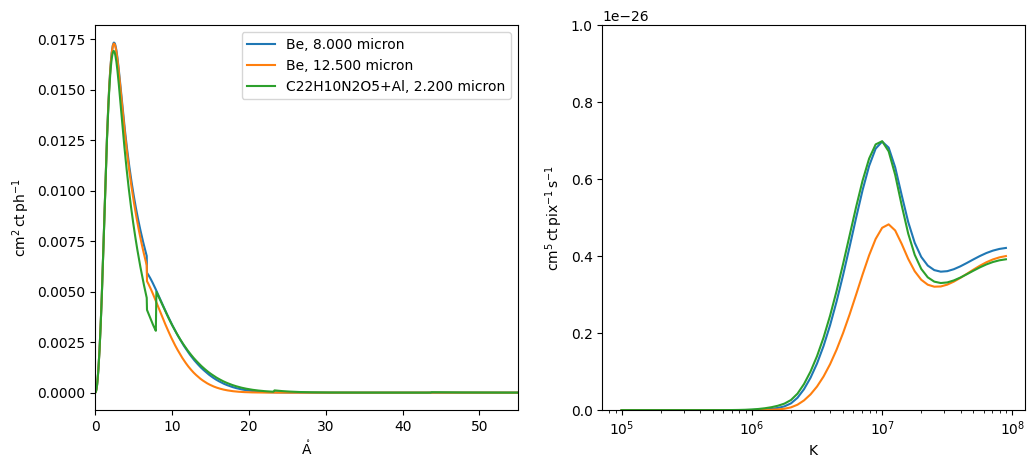

In [6]:
with quantity_support():
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    for chan in [thin_be_original, less_thin_be, modified_al_poly]:
        plt.plot(chan.wavelength, chan.wavelength_response, label=chan.filter_label)
    plt.xlim(0,55)
    plt.legend()
    plt.subplot(122)
    for chan in [thin_be_original, less_thin_be, modified_al_poly]:
        T, tresp = compute_temperature_response(spectra, chan.wavelength, chan.wavelength_response, return_temperature=True)
        plt.plot(T, tresp*chan.plate_scale, label=chan.filter_label)
    plt.xscale('log')
    #plt.yscale('log')
    plt.ylim(0,1e-26)
    #plt.legend()

In [8]:
k1 = compute_temperature_response(spectra, thin_be_original.wavelength, thin_be_original.wavelength_response)
k2 = compute_temperature_response(spectra, less_thin_be.wavelength, less_thin_be.wavelength_response)
ratio = k2 / k1

0.6789797627804394
0.7077009002946891


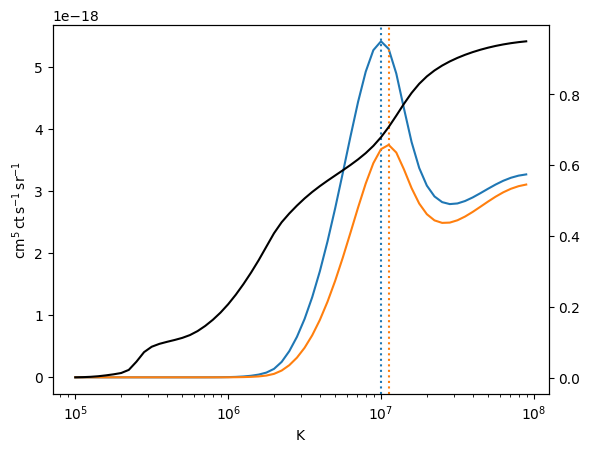

In [9]:
with quantity_support():
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(T,k1)
    ax.axvline(x=T[np.argmax(k1)],ls=':',color='C0')
    ax.plot(T,k2)
    ax.axvline(x=T[np.argmax(k2)],ls=':',color='C1')
    ax2 = ax.twinx()
    ax2.plot(T, ratio, color='k')
    ax.set_xscale('log')
    print(ratio[np.argmax(k1)])
    print(ratio[np.argmax(k2)])

Difference between current and modified design is up to 30% near the peak of the response.
